# Playlist Evaluation Notebook

Run the first cell **only once** – it generates the test prompts and asks GPT‑4 Turbo to score each playlist (takes a few minutes).
The remaining cells just visualise the `results.parquet` without extra cost.

In [1]:
import pandas as pd
df = pd.read_parquet("evaluation.playlist.results.parquet")
print(df[["prompt_1", "prompt_2", "overall"]].head())


                                        prompt_1  \
0                                 I'm motivated.   
1     I'm feeling overwhelmed after a rough day.   
2  Today was exhausting and I'm quite nostalgic.   
3                                I'm frustrated.   
4                                       I'm sad.   

                               prompt_2  overall  
0     Help me reach a more joyful mood.      3.8  
1                                            3.6  
2              I want to end up joyful.      3.8  
3     Help me reach a more lonely mood.      3.0  
4  Help me reach a more confident mood.      3.8  


In [2]:
df.to_csv("results.csv", index=False)


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,3.28,3.52,2.82,3.81,3.39,3.36
std,1.16,0.95,0.50,0.39,0.98,0.73
min,0.00,0.00,1.00,3.00,1.00,1.00
25%,3.00,3.75,3.00,4.00,3.00,3.35
50%,4.00,4.00,3.00,4.00,4.00,3.80
75%,4.00,4.00,3.00,4.00,4.00,3.80
max,4.00,4.00,4.00,4.00,4.00,3.80


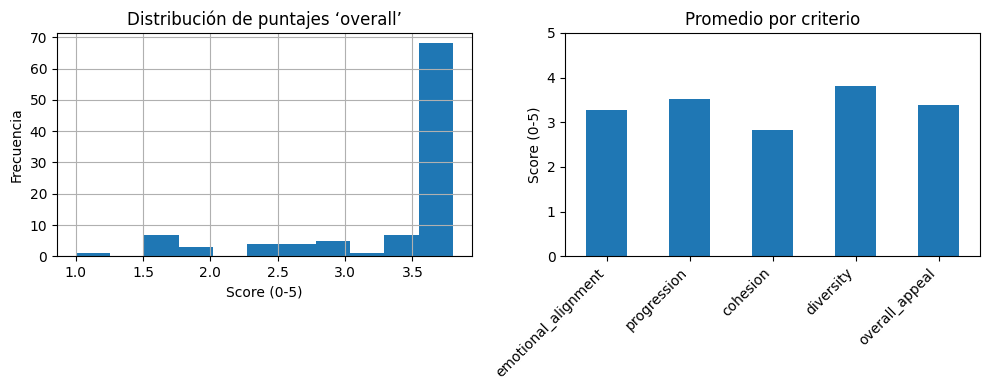

,prompt_1,prompt_2,score
0,I'm motivated.,Help me reach a more joyful mood.,3.8
2,Today was exhausting and I'm quite nostalgic.,I want to end up joyful.,3.8
7,I'm feeling lonely after a rough day.,,3.8
4,I'm sad.,Help me reach a more confident mood.,3.8
35,I'm overwhelmed.,Help me reach a more motivated mood.,3.8


,prompt_1,prompt_2,score
53,I'm frustrated.,Help me reach a more overwhelmed mood.,1.0
5,Today was exhausting and I'm quite frustrated.,I want to end up overwhelmed.,1.6
20,Currently joyful.,My goal is to feel frustrated on my way home.,1.6
19,Currently motivated.,My goal is to feel frustrated on my way home.,1.6
48,I'm frustrated.,Help me reach a more overwhelmed mood.,1.6


In [3]:
# ─── Playlist-evaluation overview ────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt

# 2. Muestra estadísticas descriptivas en pantalla
stats = df[[
    "emotional_alignment", "progression", "cohesion",
    "diversity", "overall_appeal", "overall"
]].describe().round(2)
display(stats)          # En Jupyter se ve como tabla

# 3. Crea una única figura con dos gráficos
plt.figure(figsize=(10, 4))

# 3-a Histograma de puntajes globales
plt.subplot(1, 2, 1)
df["overall"].hist(bins=11)
plt.title("Distribución de puntajes ‘overall’")
plt.xlabel("Score (0-5)")
plt.ylabel("Frecuencia")

# 3-b Barra de promedios por criterio
plt.subplot(1, 2, 2)
(df[[
   "emotional_alignment", "progression",
   "cohesion", "diversity", "overall_appeal"
 ]].mean()
 ).plot(kind="bar")
plt.ylim(0, 5)
plt.title("Promedio por criterio")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score (0-5)")

plt.tight_layout()
plt.show()

# 4. Top y bottom 5 playlists
display(df.sort_values("overall", ascending=False)
          .head(5)[["prompt_1", "prompt_2", "overall"]]
          .rename(columns={"overall": "score"}))

display(df.sort_values("overall")
          .head(5)[["prompt_1", "prompt_2", "overall"]]
          .rename(columns={"overall": "score"}))
